In [2]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random


 
df = pd.read_csv("E:/Data Analysis/archive/Expanded_data.csv")
print(df.head())


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [22]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [5]:
df = df.drop("Unnamed: 0",axis = 1)
print(df.head())
df.head()

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


change weekly study hours column

Intercept:  7.72446190788402
Coefficients:  [0.55060426 0.30159004]
Slope:  0.5506042609953228


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


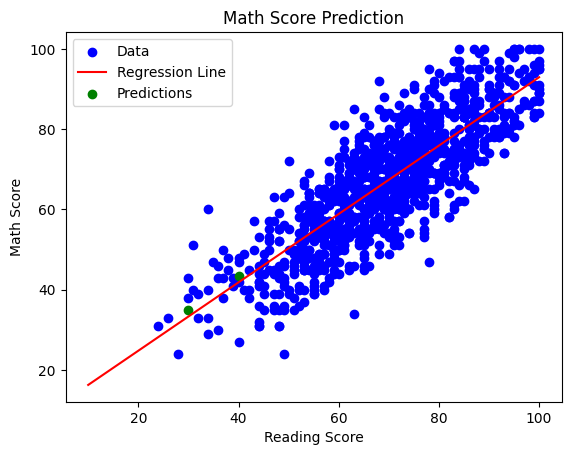

In [8]:
X = df[['ReadingScore', 'WritingScore']]
y = df['MathScore']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)
print("Slope: ", model.coef_[0])

# Create new data for predictions
new_data = pd.DataFrame(np.array([[30, 35], [40, 45]]), columns=['ReadingScore', 'WritingScore'])

# Predict on new data
predictions = model.predict(new_data)

# Sample size for plotting
sample_size = 1000

# Sample random indices from your data
sample_indices = random.sample(range(len(X)), sample_size)

# Extract the sampled data points
sampled_X = X.iloc[sample_indices]
sampled_y = y.iloc[sample_indices]

# Plot original data
plt.scatter(sampled_X['ReadingScore'], sampled_y, color='blue', label='Data')

# Plot the regression line
x_values = np.linspace(X['ReadingScore'].min(), X['ReadingScore'].max(), 100)
y_values = model.predict(np.column_stack((x_values, x_values)))  # Include both features
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Plot predictions
plt.scatter(new_data['ReadingScore'], predictions, color='green', label='Predictions')

plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Math Score Prediction')
plt.legend()
plt.show()


In [6]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct", "5-10")
df.head()


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


gender distribution

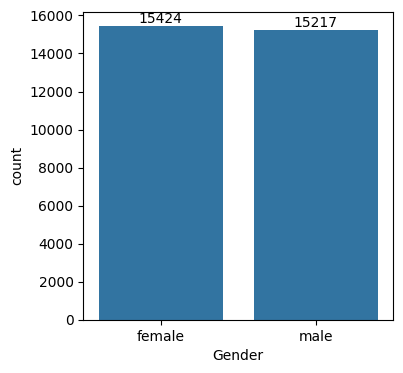

In [7]:
plt.figure(figsize= (4,4))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

from the above chart we have analysed that:
the number of females in the data is more than the number of males

In [ ]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


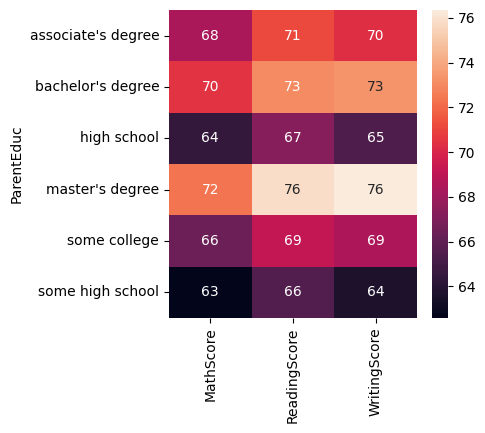

In [ ]:
plt.figure(figsize= (4,4))
sns.heatmap(gb, annot = True)
plt.show()

from the above chart we have concluded that the education of the parents have a good impact on there scores

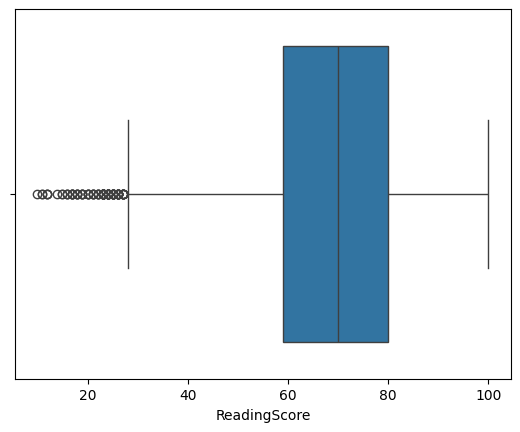

In [ ]:
sns.boxplot(data = df, x= "ReadingScore")
plt.show()

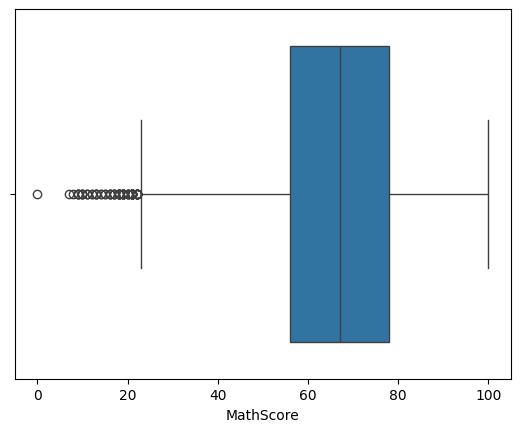

In [ ]:
sns.boxplot(data = df, x= "MathScore")
plt.show()

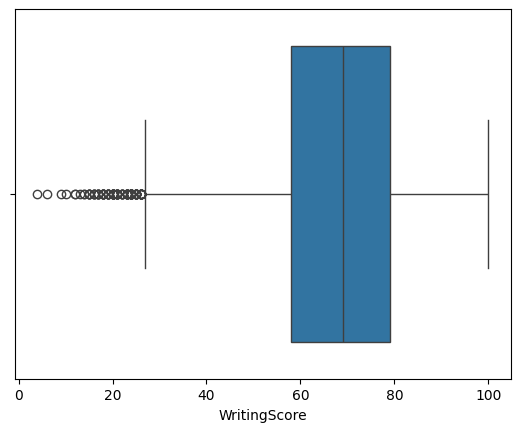

In [ ]:
sns.boxplot(data = df, x= "WritingScore")
plt.show()

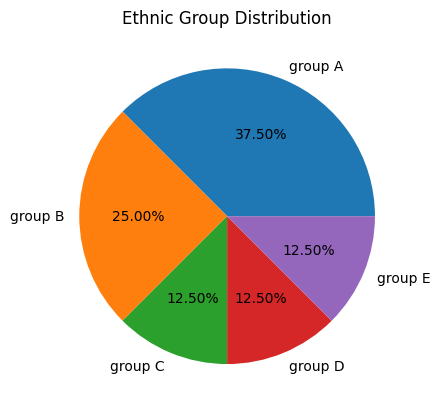

In [32]:
data = {'EthnicGroup': ['group A', 'group B', 'group A', 'group C', 'group B', 'group D', 'group E', 'group A']}
df = pd.DataFrame(data)

# Count occurrences for each ethnic group
group_counts = df['EthnicGroup'].value_counts()

# Extract data for the pie chart
group_labels = group_counts.index.to_numpy()
group_sizes = group_counts.to_numpy()

# Create the pie chart
plt.pie(group_sizes, labels=group_labels, autopct="%1.2f%%")  # Use "%1.2f%%" for exact counts
plt.title("Ethnic Group Distribution")
plt.show()